<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben 25.01.2023</h1></center>

<div class="alert alert-success" role="alert">
  <hr>
      <h4 style="font-family:courier;font-size:1.3em">
Lade die CSV Datei 'Dataset.csv' herunter und speichere sie in einem gewünschten Ordner auf deinem Rechner.
</h4>
<hr>
</div>

<div class="alert alert-success" role="alert">
          <h4 style="font-family:courier;font-size:1.7em">
Aufgabe1
</h4>
  <hr>
      <h4 style="font-family:courier;font-size:1.5em">
Bearbeite die angegebenen Steps<br>
</h4>
</div>

# Step1
### Lese die  'Dataset.csv' Datei  und speichere den Dataframe in der Variable 'data'. Gib anschließend die ersten 4 Zeilen des Dataframes aus.


In [1]:
import pandas as pd

dataset_main = pd.read_csv(r'E:/Datacraft/Python_Projects/Tagesaufgabe/Dataset.csv')
dataset_main.head(4)

C:\Users\Jhanacah\AppData\Local\Temp\ipykernel_20956\1560101560.py:3: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_main = pd.read_csv(r'E:/Datacraft/Python_Projects/Tagesaufgabe/Dataset.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566


# Step2
## Berechne die Menge an NaNs in jeder Spalte und lass dir die 10 Spalten mit den meisten NaNs anzeigen.


In [2]:
count_null = dataset_main.isnull().sum()
count_null.sort_values(ascending = False).head(10)

TIDF Compliance                  198898
Voluntary Soft-Story Retrofit    198865
Unit Suffix                      196939
Street Number Suffix             196684
Site Permit                      193541
Structural Notification          191978
Fire Only Permit                 180073
Unit                             169421
Completed Date                   101709
Permit Expiration Date            51880
dtype: int64

# Step 3
### Lösche die Spalten in denen mehr als 50% der Werte NaNs sind. Überschreibe dazu deinen DataFrame.

<AxesSubplot:>

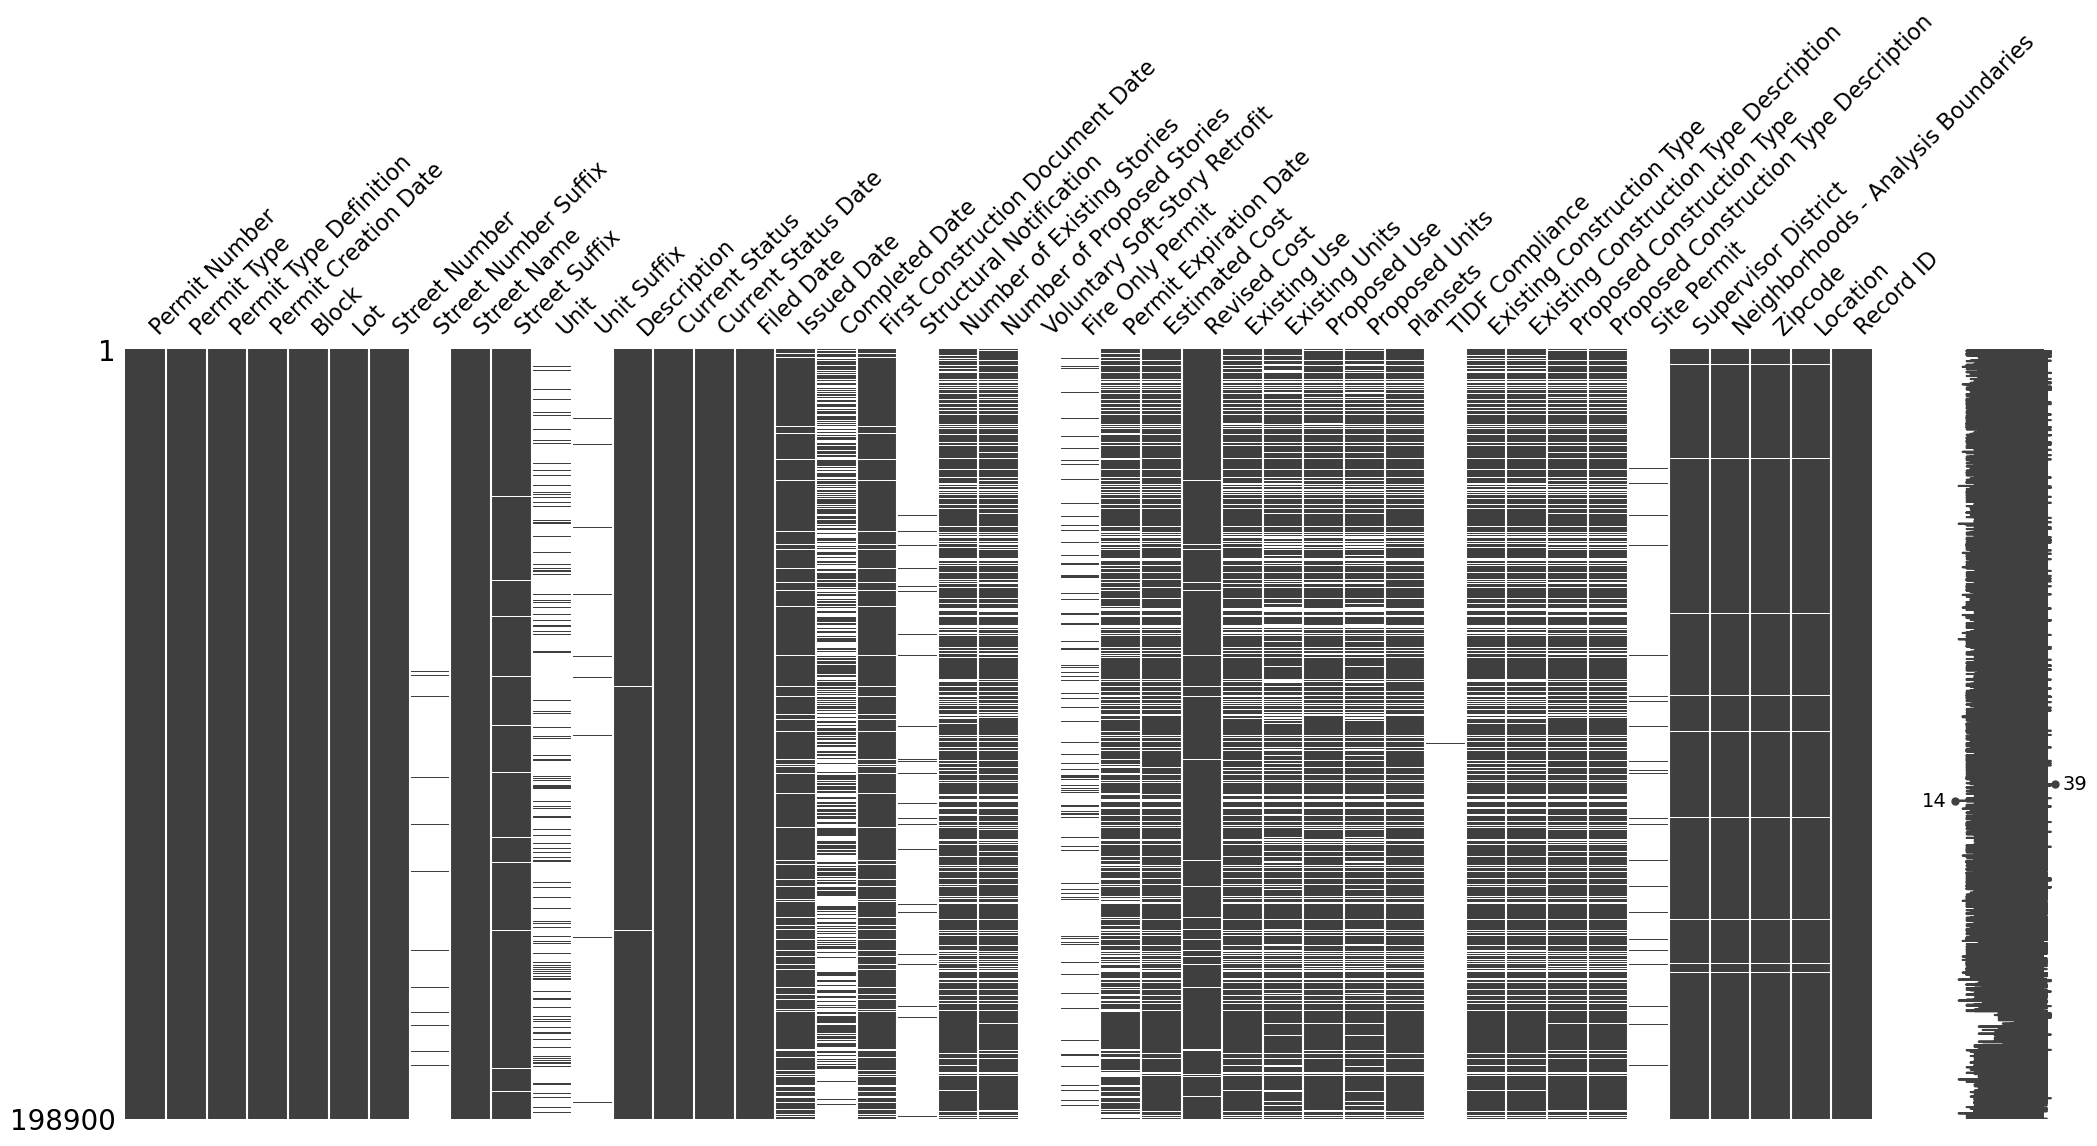

In [3]:
# Vorher
import missingno as msno

msno.matrix(dataset_main)

In [4]:
# Hier drop
perc = 50.0
min_count =  int(((100 - perc) / 100) * dataset_main.shape[0] + 1)
dataset_main.dropna(axis = 1, thresh = min_count, inplace = True)

<AxesSubplot:>

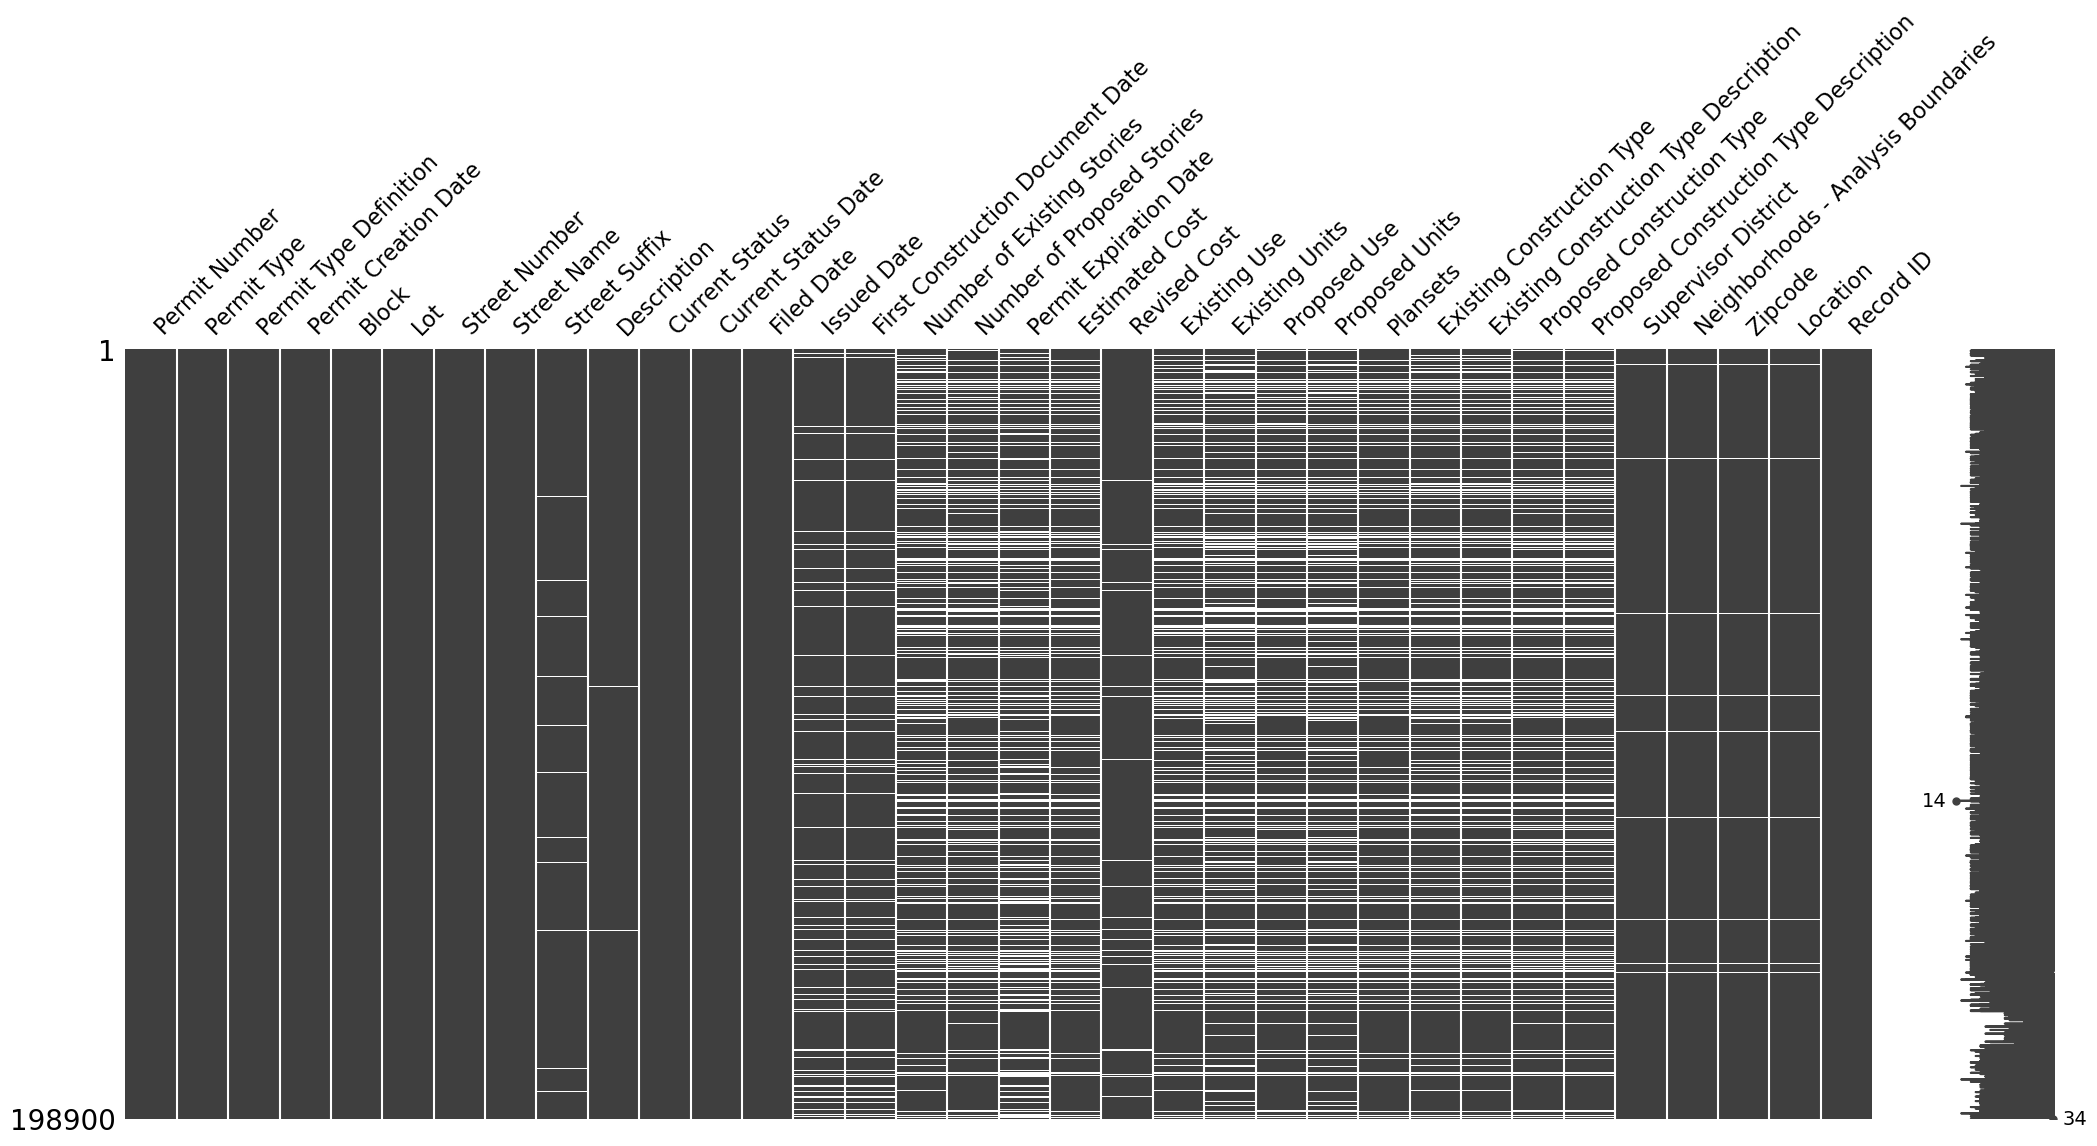

In [5]:
msno.matrix(dataset_main)

# Step 4 - Optional
### Prozentual gesehen, wie viele NaN Werte gibt es im ganzen DataFrame?

In [6]:
# Oh boy... Also isnull().sum() gibt null werte pro column aus und das wird mit .sum() noch mal zusammengezählt und dann durch len des datensatzes geteilt
dataset_main.isnull().sum().sum()/len(dataset_main)

3.1062493715434893

# Step 5
### Zeige mithilfe der missingno Library alle NaN Werte in einem Graphen an

<AxesSubplot:>

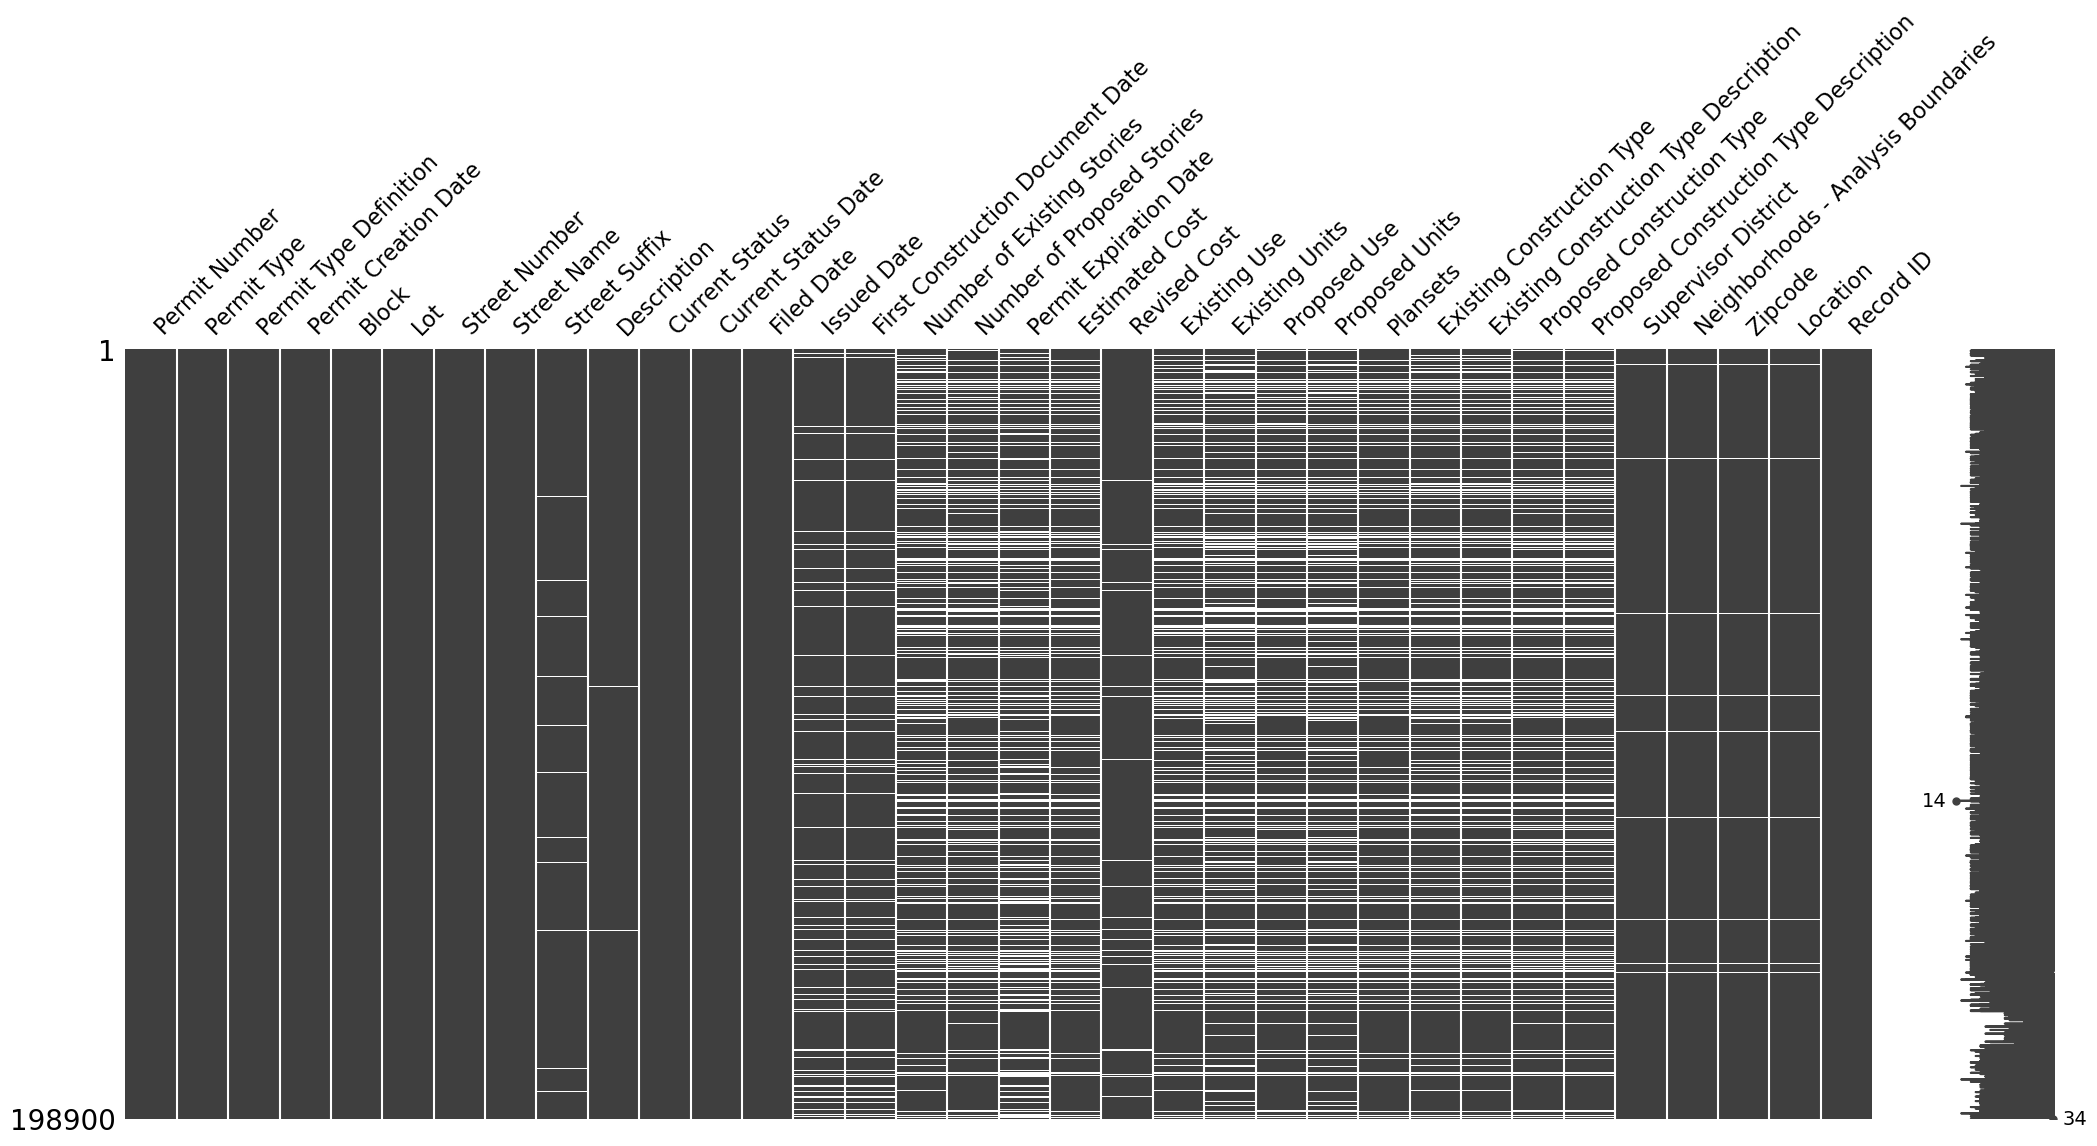

In [7]:
# Hab ich oben schon importiert
msno.matrix(dataset_main)

# Step 6 - Optional
## Fülle alle NaN Werte in der Spalte "Existing Use" mit dem darüberliegenden NICHT NaN Wert!
## Lass dir das Ergebnis nur anzeigen und überschreibe den DataFrame nicht!
### Die beiden folgenden Tabellen sind Beispiele zur Veranschaulichung. Die erste zeigt die Ausgangstabelle und die zweite das Ergebnis nach Anwendung des zweiten Schrittes.

Spalte 1 | Spalte 2 
-------- | -------- 
2   | 1
 3  | NaN 
NaN | 7  
NaN   | NaN 

##### Endergebnis
Spalte 1 | Spalte 2 
-------- | -------- 
2   | 1
 3  | 1 
3 | 7  
3   | 7

In [8]:
# Vorher
dataset_main['Existing Use']

0         tourist hotel/motel
1         tourist hotel/motel
2                retail sales
3           1 family dwelling
4                retail sales
                 ...         
198895                    NaN
198896             apartments
198897                    NaN
198898                    NaN
198899                    NaN
Name: Existing Use, Length: 198900, dtype: object

In [9]:
# Nachher
# ffill = forward fill
dataset_main['Existing Use'].fillna(method = 'ffill')

0         tourist hotel/motel
1         tourist hotel/motel
2                retail sales
3           1 family dwelling
4                retail sales
                 ...         
198895      2 family dwelling
198896             apartments
198897             apartments
198898             apartments
198899             apartments
Name: Existing Use, Length: 198900, dtype: object

# Step 7
## Ersetze die NaN Werte in der Spalte "Number of Existing Stories"  mit einer 1

In [10]:
dataset_main['Number of Existing Stories'].fillna(1)

0         6.0
1         7.0
2         6.0
3         2.0
4         3.0
         ... 
198895    1.0
198896    4.0
198897    1.0
198898    1.0
198899    1.0
Name: Number of Existing Stories, Length: 198900, dtype: float64

# Step 8
## Ersetze die NaN Werte in der Spalte "Existing Units"  mit dem Maximalwert dieser Spalte

In [12]:
dataset_main['Existing Units'].fillna(dataset_main['Existing Units'].max())

0          143.0
1         1907.0
2           39.0
3            1.0
4         1907.0
           ...  
198895    1907.0
198896       4.0
198897    1907.0
198898    1907.0
198899    1907.0
Name: Existing Units, Length: 198900, dtype: float64

# Step 9
## Ersetze die NaN Werte in der Spalte "Plansets"  mit einer linearen Interpolation

In [13]:
dataset_main['Plansets'].interpolate(method = 'linear')

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
198895    1.0
198896    2.0
198897    2.0
198898    2.0
198899    2.0
Name: Plansets, Length: 198900, dtype: float64

# Step 10
### Lade das aktualisierte Notebook auf den Server (Github)

<div class="alert alert-success" role="alert">
          <h4 style="font-family:courier;font-size:1.7em">
Aufgabe2 - SQL
</h4>
  <hr>
      <h4 style="font-family:courier;font-size:1.5em">

</h4>
</div>

Wie nennt man in SQL folgende Begriffe:

Tabelle: Datenbankobjekt
Zeilen: Tupel
Spalten: Attribute

Welche Eigenschaften sollten Transaktionen besitzen? Nenne das Schlagwort und erläutere die einzelnen Bestandteile

Unter Transaktionen versteht man eine Folge von Operationen, die nur *komplett* oder *gar nicht* durchgeführt werden. Eine Transaktion kann aus mehreren **Aktionen** bestehen. Ruft eine Aktion einen Fehler hervor, wird die gesamte Transaktion abgebrochen, ohne den Datensatz zu verändern. Auf diese Weise wird dafür gesorgt, dass die Integrität der Daten geschützt wird.

Ein weiterer Punkt um die Daten zu schützen, ist den Zugriff zu regulieren. Wenn gerade schon jemand einen bestimmten Satz Dateien ändert, soll nicht einfach jemand parallel daran arbeiten, damit kein Durcheinander entsteht.
Innerhalb der Datenbank wird das mit der sogenannten **Sperre** realisiert. Dies ist ein durch den Datenbankserver bereitgestellter Mechanismus, um Daten auf die gerade aufgrund einer Transaktion zugegriffen wird für weitere Zugriffe zu sperren, bis der Vorgang *abgeschlossen* oder *abgebrochen* ist.
Hier wird zwischen **Schreib- und Lesesperren** unterschieden. Auf Daten kann nur eine Schreibsperre, aber beliebig viele Lesesperren gesetzt werden. Damit sollen Datensatzkonflikte und Versionierungsprobleme verhindert werden.
Dies funktioniert folgendermaßen:

Fordert ein Nutzer während einer Transaktion die Daten an, erhält er den aktuellen Stand der Daten. Für ihn ändern sich die Daten bis zum Ende der Transaktion **nicht**.

Eine Transaktion umfasst also einen Startpunkt, die auszuführenden SQL-Befehle und einen Endpunkt. Innerhalb einer Transaktion können beliebig viele SQL-Befehle ausgeführt werden.

Transaktionen werden auch mittels des Begriffs ACID (Atomicity, Consistency, Isolation & Durability) beschrieben.

**Atomicity**: kennzeichnet Transaktionen dafür, dass sie entweder vollständig oder gar nicht ausgeführt werden
**Consistency**: Eine Transaktion überführt eine Datenbank immer in einem konsistenten Zustand (eben verändert oder wie im Ursprung)
**Isolation**: Die Transaktionen werden in ihrer Ausführung nicht durch parallel ausgeführte Befehle beeinträchtigt.
**Durability**: Wird eine Transaktion erfolgreich durchgeführt, wird die Änderung dauerhaft in die Datenbank übernommen.



#